In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

In [ ]:
input_layer = Input(shape=(784,))
x = Dense(256, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
encoded = Dense(3, activation='relu')(x)
x = Dense(64, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.3275 - val_loss: 0.2249
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.2211 - val_loss: 0.2109
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.2097 - val_loss: 0.2042
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.2026 - val_loss: 0.1980
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1973 - val_loss: 0.1944
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1936 - val_loss: 0.1921
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1910 - val_loss: 0.1901
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1892 - val_loss: 0.1901
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1878 - val_loss: 0.1870
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.1860 - val_loss: 0.1861
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.1850 - val_loss: 0.1848
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━

In [ ]:
encoder = Model(inputs=input_layer, outputs=encoded)

In [ ]:
encoded_imgs = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


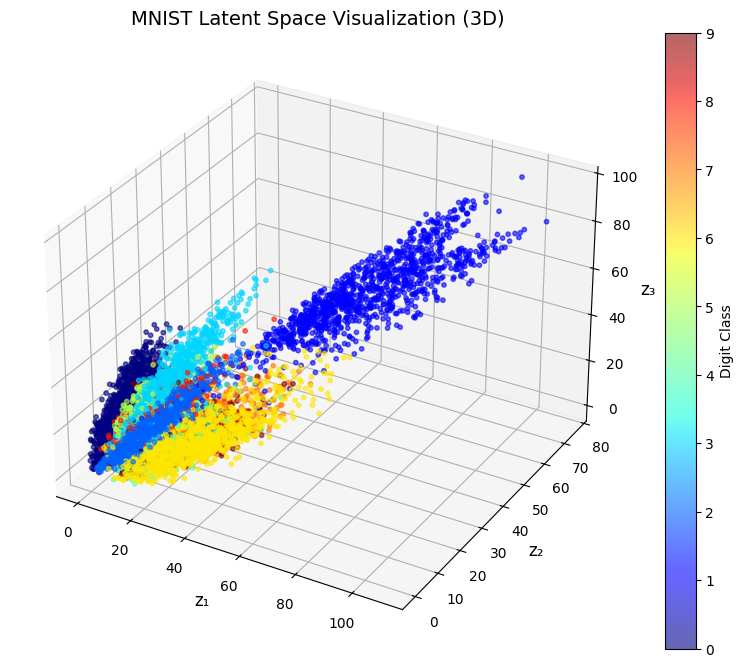

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], encoded_imgs[:,2], c=y_test, cmap='jet', s=10, alpha=0.6)

ax.set_xlabel("z₁", fontsize=12)
ax.set_ylabel("z₂", fontsize=12)
ax.set_zlabel("z₃", fontsize=12)
ax.set_title("MNIST Latent Space Visualization (3D)", fontsize=14)

fig.colorbar(scatter, label='Digit Class', ticks=range(10))

plt.show()